In [133]:
!pip install -q neattext

In [134]:
import numpy as np
import pandas as pd
import neattext.functions as nfx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load

In [135]:

df = pd.read_csv('/content/tweet_emotions.csv')

In [136]:
df.head()


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [137]:
df = df.iloc[:, 1:]

In [138]:
df

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [139]:
import re

In [140]:

def clean_text(text):
    text = nfx.remove_emails(text)
    text = nfx.remove_urls(text)
    text = nfx.remove_punctuations(text)
    text = re.sub(r'@[\w]+', '', text)
    text = text.lower().strip()
    return text

In [141]:
df['cleaned_text'] = df['content'].astype(str).apply(clean_text)


In [142]:
print(df.head())
print(df['sentiment'].unique())

    sentiment                                            content  \
0       empty  @tiffanylue i know  i was listenin to bad habi...   
1     sadness  Layin n bed with a headache  ughhhh...waitin o...   
2     sadness                Funeral ceremony...gloomy friday...   
3  enthusiasm               wants to hang out with friends SOON!   
4     neutral  @dannycastillo We want to trade with someone w...   

                                        cleaned_text  
0  i know  i was listenin to bad habit earlier an...  
1  layin n bed with a headache  ughhhhwaitin on y...  
2                      funeral ceremonygloomy friday  
3                wants to hang out with friends soon  
4  we want to trade with someone who has houston ...  
['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [155]:
df = df[df['sentiment'].isin(['happiness', 'sadness', 'anger'])]

In [156]:
print(df['sentiment'].value_counts())

sentiment
happiness    5209
sadness      5165
anger         110
Name: count, dtype: int64


In [157]:

X = df['cleaned_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
df

,sentiment,content,cleaned_text
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on y...
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
6,sadness,"I should be sleep, but im not! thinking about ...",i should be sleep but im not thinking about an...
8,sadness,@charviray Charlene my love. I miss you,charlene my love i miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?,im sorry at least its friday
...,...,...,...
39986,happiness,going to watch boy in the striped pj's hope i ...,going to watch boy in the striped pjs hope i d...
39987,happiness,"gave the bikes a thorough wash, degrease it an...",gave the bikes a thorough wash degrease it and...
39988,happiness,"had SUCH and AMAZING time last night, McFly we...",had such and amazing time last night mcfly wer...
39994,happiness,Succesfully following Tayla!!,succesfully following tayla


In [159]:
X

,cleaned_text
1,layin n bed with a headache ughhhhwaitin on y...
2,funeral ceremonygloomy friday
6,i should be sleep but im not thinking about an...
8,charlene my love i miss you
9,im sorry at least its friday
...,...
39986,going to watch boy in the striped pjs hope i d...
39987,gave the bikes a thorough wash degrease it and...
39988,had such and amazing time last night mcfly wer...
39994,succesfully following tayla


In [160]:

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [161]:

X_test_tfidf = tfidf.transform(X_test)
y_pred = clf.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        26
   happiness       0.80      0.80      0.80      1015
     sadness       0.79      0.81      0.80      1056

    accuracy                           0.80      2097
   macro avg       0.53      0.54      0.53      2097
weighted avg       0.79      0.80      0.79      2097



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


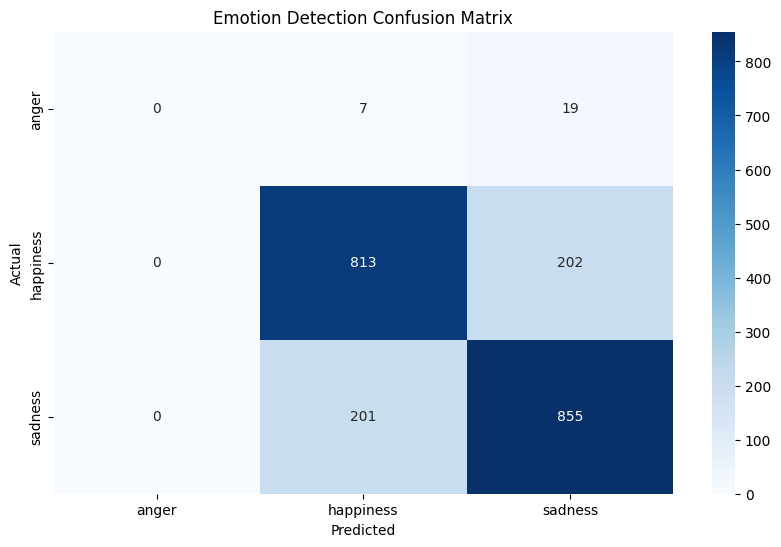

In [162]:
#Confusion matrix visualization
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Emotion Detection Confusion Matrix")
plt.show()

In [151]:
#saving the models
dump(tfidf, 'tfidf_vectorizer.joblib')
dump(clf, 'emotion_classifier.joblib')

['emotion_classifier.joblib']

In [154]:

def predict_emotion(text):
    loaded_tfidf = load('tfidf_vectorizer.joblib')
    loaded_clf = load('emotion_classifier.joblib')
    cleaned_text = clean_text(text)
    text_vec = loaded_tfidf.transform([cleaned_text])
    prediction = loaded_clf.predict(text_vec)
    proba = loaded_clf.predict_proba(text_vec)
    return {
        'text': text,
        'cleaned_text': cleaned_text,
        'emotion': prediction[0],
    }

# Example
sample_text = "@charviray Charlene my love. I miss you"
result = predict_emotion(sample_text)
print("\nDemo Prediction:")
print(f"Original Text: {result['text']}")
print(f"Cleaned Text: {result['cleaned_text']}")
print(f"Predicted Emotion: {result['emotion']}")



Demo Prediction:
Original Text: @charviray Charlene my love. I miss you
Cleaned Text: charlene my love i miss you
Predicted Emotion: sadness
